<a href="https://colab.research.google.com/github/mustafasherbini/data-exploration-and-modeling/blob/main/focusing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np              # linear algebra
import pandas as pd             # data processing, dataset file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split 
import seaborn as sns           # to visualize random distributions
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from scipy.stats.mstats import winsorize
from sklearn.impute import SimpleImputer







In [2]:
df = pd.read_csv("Ecommerce Customers")
df.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.duplicated().sum()

0

SlateBlue               7
Cyan                    7
CadetBlue               7
GreenYellow             7
Teal                    7
                       ..
MediumPurple            1
CornflowerBlue          1
LightGoldenRodYellow    1
PowderBlue              1
LawnGreen               1
Name: Avatar, Length: 138, dtype: int64


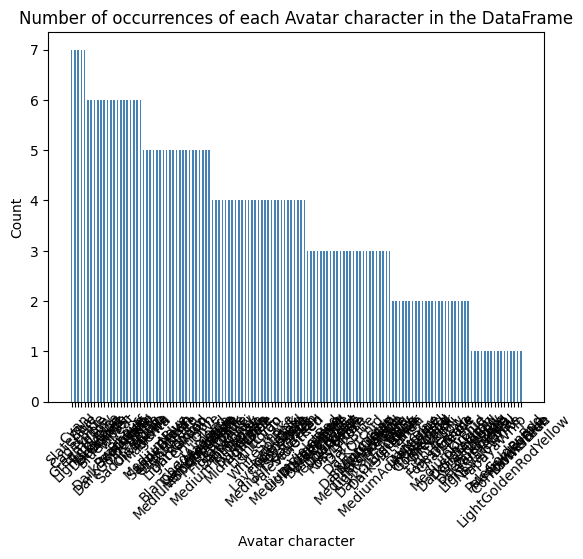

In [5]:
counts = df['Avatar'].value_counts()

print(counts)
# plot the counts using a bar chart with wider bars
plt.bar(counts.index, counts.values, color='steelblue', width=0.5)

# add axis labels and a title
plt.xlabel('Avatar character')
plt.ylabel('Count')
plt.title('Number of occurrences of each Avatar character in the DataFrame')

# rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# display the plot
plt.show()


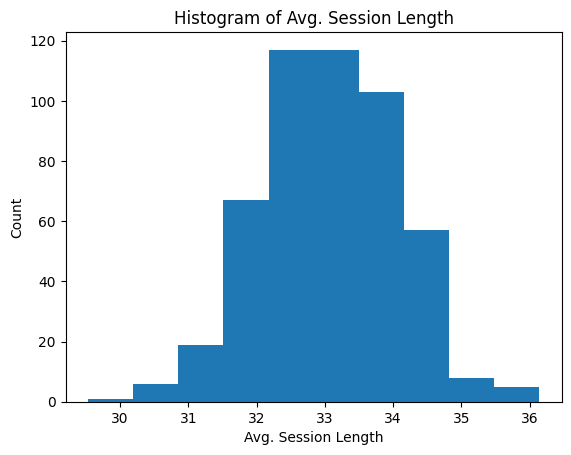

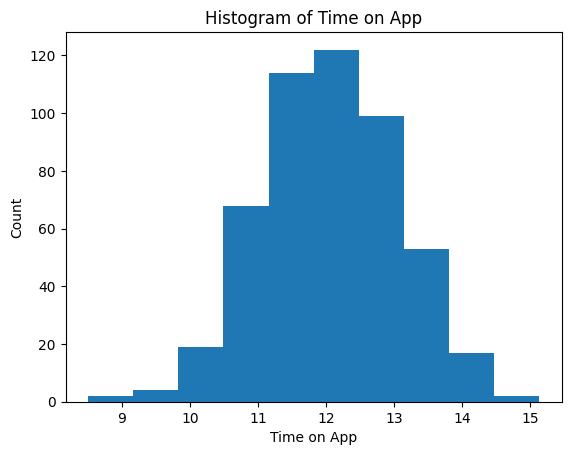

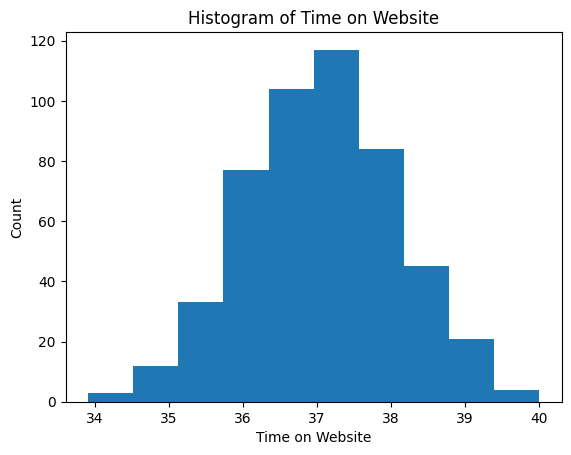

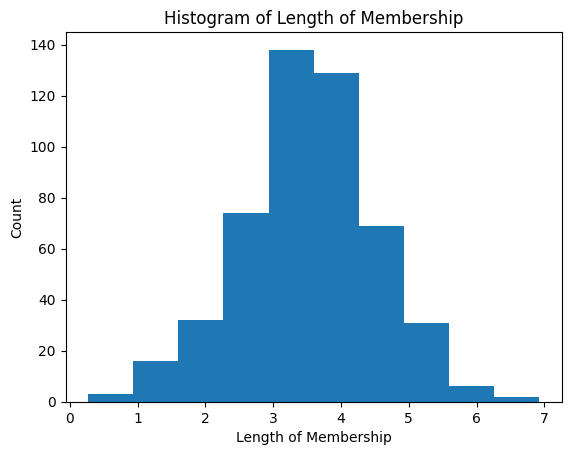

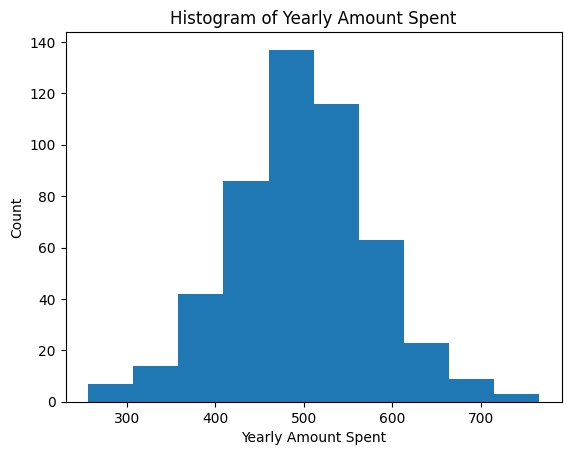

In [6]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# loop over the columns and create a plot for each of them
for col in numeric_cols.columns:
    plt.hist(numeric_cols[col], bins=10)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Histogram of {}'.format(col))
    plt.show()

In [7]:
df = df.drop(columns=['Email', 'Address'])
df['Avatar'] = df['Avatar'].astype('category').cat.codes

df.head

<bound method NDFrame.head of      Avatar  Avg. Session Length  Time on App  Time on Website  \
0       132            34.497268    12.655651        39.577668   
1        25            31.926272    11.109461        37.268959   
2         6            33.000915    11.330278        37.110597   
3       114            34.305557    13.717514        36.721283   
4        80            33.330673    12.795189        37.536653   
..      ...                  ...          ...              ...   
495     127            33.237660    13.566160        36.417985   
496     104            34.702529    11.695736        37.190268   
497      18            32.646777    11.499409        38.332576   
498     128            33.322501    12.391423        36.840086   
499      27            33.715981    12.418808        35.771016   

     Length of Membership  Yearly Amount Spent  
0                4.082621           587.951054  
1                2.664034           392.204933  
2                4.104543     

In [8]:
df=(df-df.mean())/df.std()   #rescaling for all data
df.head(501)

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,1.542076,1.454894,0.606672,2.491094,0.549556,1.117535
1,-1.066076,-1.135365,-0.948514,0.206349,-0.870056,-1.350431
2,-1.529206,-0.052670,-0.726412,0.049631,0.571495,-0.148352
3,1.103321,1.261747,1.674713,-0.335642,-0.413582,1.040642
4,0.274563,0.279558,0.747022,0.471265,0.913507,1.261960
...,...,...,...,...,...,...
495,1.420200,0.185849,1.522478,-0.635792,0.213266,0.939716
496,0.859569,1.661693,-0.358827,0.128475,0.043095,0.374898
497,-1.236703,-0.409462,-0.556297,1.258926,1.425833,0.659475
498,1.444575,0.271325,0.340907,-0.218072,-1.197842,-0.540183


In [9]:
# create an overall outlier mask for the DataFrame
outlier_mask = pd.Series([False] * len(df))

# iterate over the columns in the DataFrame and calculate the outlier mask for each column
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    col_outlier_mask = ((df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr)))
    outlier_mask |= col_outlier_mask

# count the number of outlier rows
num_outliers = outlier_mask.sum()

print(num_outliers)
df_no_outliers = df.loc[~outlier_mask]

# overwrite the original DataFrame with the new DataFrame without the outlier rows
df = df_no_outliers




24


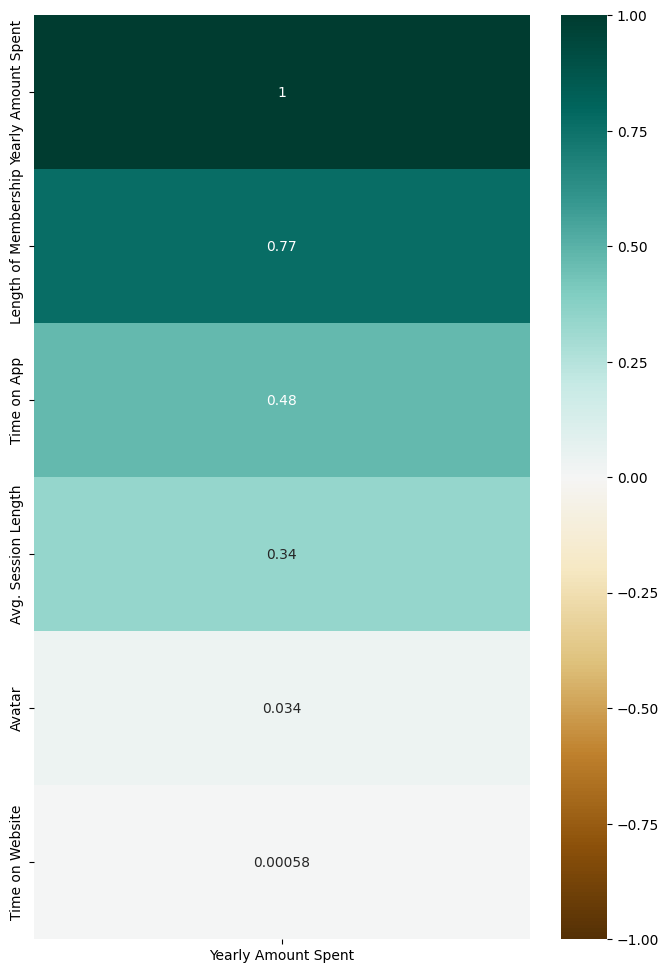

In [10]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Yearly Amount Spent']].sort_values(by='Yearly Amount Spent', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


In [11]:
X= df.drop(columns=['Yearly Amount Spent','Time on Website','Avatar'])

y = df['Yearly Amount Spent']



In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert X and y to arrays and reshape y
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

print(y_test.shape)

# Add a column of ones to the input data for the intercept term
X_train = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)

# Initialize theta
theta = np.zeros((X_train.shape[1], 1))

# Define the cost function
def compute_cost(X, y, theta):  
    m = len(y)
    J = (1/(2*m)) * np.sum(np.square(X.dot(theta) - y))
    return J



# Gradient descent algorithm
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = theta - (alpha/m) * X.T.dot(X.dot(theta) - y)
        J_history[i] = compute_cost(X, y, theta)
    return theta, J_history

alpha = 0.01
num_iters = 1000
theta, J_history = gradient_descent(X_train, y_train, theta, alpha, num_iters)

# Make predictions on the test set
y_pred = X_test.dot(theta)

# Compute the R-squared score
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)


(96, 1)
R-squared: 0.9788994394091051
